References:


In [135]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import io

from skimage import color
from skimage import exposure
from skimage import filters
from skimage import io
from skimage import morphology
from skimage import util

### **1. [50] Diberikan citra virus.jpg berikut ini**

a. Konversikan citra ini ke dalam color space CMY, lalu lakukan smoothing
terhadap hasilnya dengan kernel 4x4

Text(0.5, 1.0, 'Image in CMY color space with 4x4 Median Smooth Filtering')

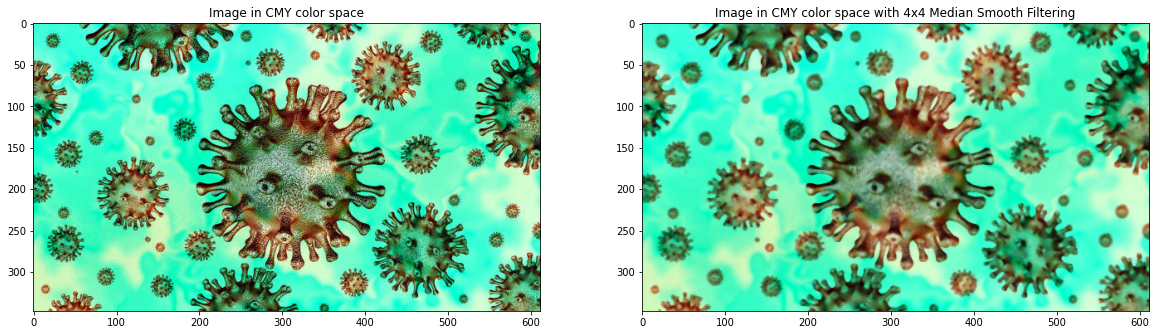

In [136]:
img_virus = io.imread("Citra Lab 2/virus.jpg")

R = img_virus[:,:,0]
G = img_virus[:,:,1]
B = img_virus[:,:,2]

C = 1 - util.img_as_float(R)
M = 1 - util.img_as_float(G)
Y = 1 - util.img_as_float(B)

CMY = np.zeros(img_virus.shape)
CMY[:,:,0] = C
CMY[:,:,1] = M
CMY[:,:,2] = Y

C_smoothened_4 = filters.rank.median(C, selem=morphology.square(4))
M_smoothened_4 = filters.rank.median(M, selem=morphology.square(4))
Y_smoothened_4 = filters.rank.median(Y, selem=morphology.square(4))

CMY_smoothened_4 = util.img_as_ubyte(np.zeros(CMY.shape))
CMY_smoothened_4[:,:,0] = C_smoothened_4
CMY_smoothened_4[:,:,1] = M_smoothened_4
CMY_smoothened_4[:,:,2] = Y_smoothened_4

plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(CMY, cmap="gray")
plt.title('Image in CMY color space')

plt.subplot(1, 2, 2)
plt.imshow(CMY_smoothened_4, cmap="gray")
plt.title('Image in CMY color space with 4x4 Median Smooth Filtering')

b. Konversikan citra ini ke dalam color space CMY, lalu lakukan smoothing
terhadap hasilnya dengan kernel 9x9

Text(0.5, 1.0, 'Image in CMY color space with 9x9 Median Smooth Filtering')

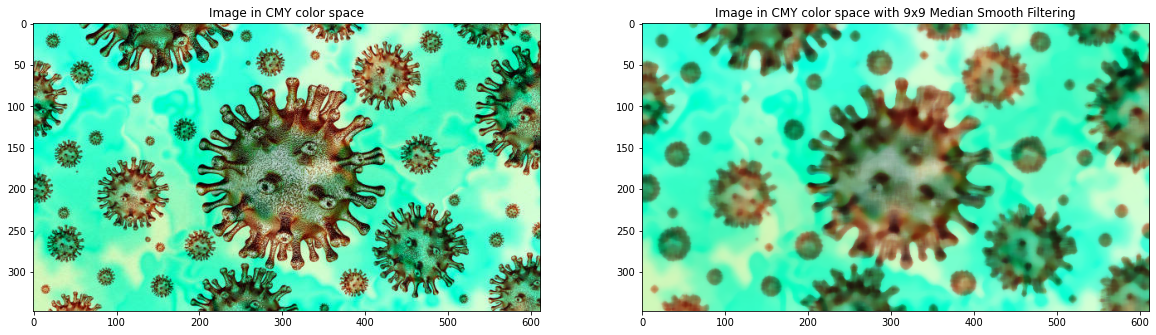

In [137]:
C_smoothened_9 = filters.rank.median(C, selem=morphology.square(9))
M_smoothened_9 = filters.rank.median(M, selem=morphology.square(9))
Y_smoothened_9 = filters.rank.median(Y, selem=morphology.square(9))

CMY_smoothened_9 = util.img_as_ubyte(np.zeros(CMY.shape))
CMY_smoothened_9[:,:,0] = C_smoothened_9
CMY_smoothened_9[:,:,1] = M_smoothened_9
CMY_smoothened_9[:,:,2] = Y_smoothened_9

plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(CMY, cmap="gray")
plt.title('Image in CMY color space')

plt.subplot(1, 2, 2)
plt.imshow(CMY_smoothened_9, cmap="gray")
plt.title('Image in CMY color space with 9x9 Median Smooth Filtering')

c. Bandingkan hasil citra pada poin a dan b

Text(0.5, 1.0, 'Image in CMY color space with 9x9 Median Smooth Filtering')

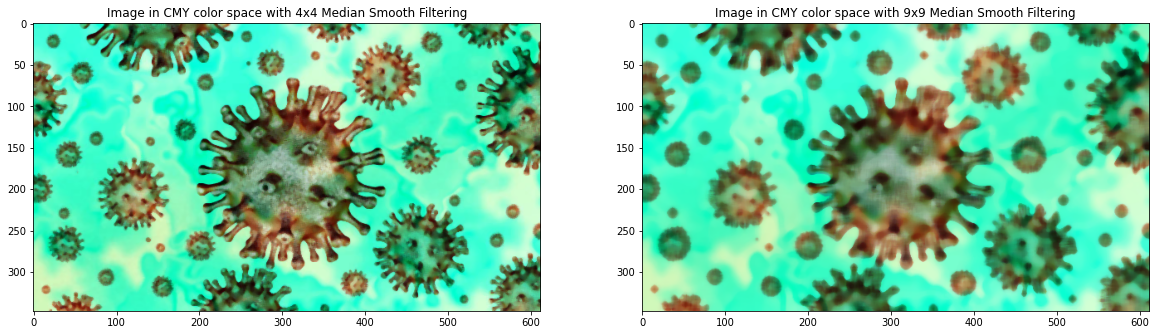

In [138]:
plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(CMY_smoothened_4, cmap="gray")
plt.title('Image in CMY color space with 4x4 Median Smooth Filtering')

plt.subplot(1, 2, 2)
plt.imshow(CMY_smoothened_9, cmap="gray")
plt.title('Image in CMY color space with 9x9 Median Smooth Filtering')

Didapatkan bahwa

d. Lakukan clustering menggunakan metode k-mean clustering dengan k = 4

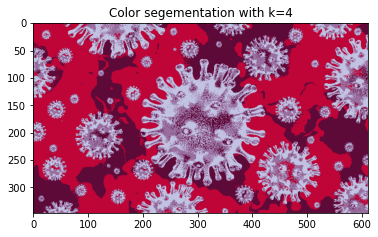

In [139]:
img_virus = cv2.imread("Citra Lab 2/virus.jpg")
img_virus = cv2.cvtColor(img_virus, cv2.COLOR_BGR2RGB)

pixel_values = img_virus.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 4

_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()

segmented_image_4 = centers[labels.flatten()]
segmented_image_4 =segmented_image_4.reshape(img_virus.shape)

plt.imshow(segmented_image_4)
plt.title("Color segementation with k=4")
plt.show()

e. Lakukan clustering menggunakan metode k-mean clustering dengan k = 9

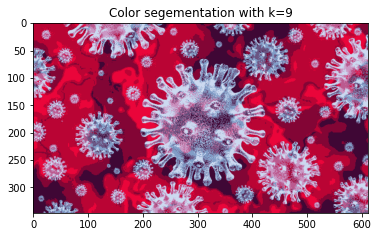

In [140]:
k = 9

_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()

segmented_image_9 = centers[labels.flatten()]
segmented_image_9 =segmented_image_9.reshape(img_virus.shape)

plt.imshow(segmented_image_9)
plt.title("Color segementation with k=9")
plt.show()

f. Ceritakan perbedaan yang kamu dapatkan pada poin d dan e, serta jelaskan
mengapa perbedaan tersebut bisa terjadi

Text(0.5, 1.0, 'Color segementation with k=9')

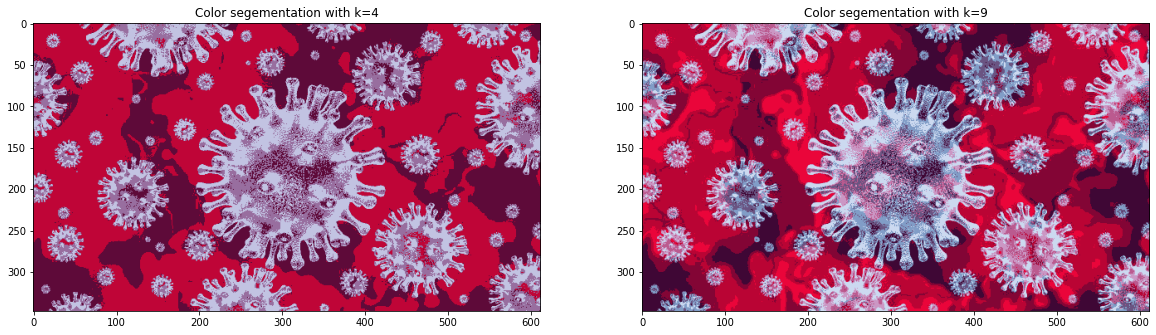

In [141]:
plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(segmented_image_4, cmap="gray")
plt.title('Color segementation with k=4')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image_9, cmap="gray")
plt.title('Color segementation with k=9')

Didapatkan bahwa

### **2. [50] Diberikan citra bird.jpg berikut ini**

a. Terapkan sharpening pada gambar tersebut untuk ketiga channel R, G, dan B

b. Terapkan contrast stretching terhadap ketiga channel R, G dan B lalu tampilkan
hasilnya sebagai satu citra!

c. Lakukan konversi gambar bird.jpg tersebut menjadi bentuk citra HSV! Terapkan
sharpening pada gambar tersebut pada channel V. Jangan lupa untuk mengubah
citra HSV menjadi RGB terlebih dahulu sebelum ditampilkan.

d. Terapkan contrast stretching terhadap channel V lalu tampilkan hasilnya sebagai
satu citra! Jangan lupa untuk mengubah citra HSV menjadi RGB terlebih dahulu
sebelum ditampilkan.

e. Ceritakan perbedaan dari citra awal, citra hasil sharpening, dan hasil contrast
stretching pada channel RGB dan channel V (hint: gunakan histogram untuk
menunjukkan perbedaan)